LSE Course 2: Final Assessment
S_Golonka

In [1]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from datetime import datetime


sns.set(rc = {'figure.figsize':(15,10)})

### Required: Report submission:
Insert URL (to your public GitHub repository) and a screenshot - double click cell to edit
- [My Github Repo](https://github.com/username/reponame)
- Screenshot demo (replace with your own).

!['My Github screenshot](http://github.com/apvoges/lse-ca/blob/main/GitHubScreenshot.png?raw=true)
(Note that this only works if your repo is set to **public**. Alternatively you need to refer to a local image and include this image in your submission.)

### 1.2) Presentation expectations:
- Describe the role and how workflow tools such as GitHub can be used to add value to organisations.

## Activity 2

In [ ]:
# Load the COVID-19 cases and vaccine data sets 

In [ ]:
covid_19_uk_cases=pd.read_csv(r'C:\Users\Public\Documents\covid_19_uk_cases.csv')
covid_19_uk_vaccinated=pd.read_csv(r'C:\Users\Public\Documents\covid_19_uk_vaccinated.csv')

covid_19_uk_cases.info()
covid_19_uk_vaccinated.info()

In [ ]:
covid_19_uk_cases.describe()
print(covid_19_uk_cases.shape)

#covid cases descriptive statistics and dataframe shape

In [ ]:
covid_19_uk_vaccinated.describe()
print(covid_19_uk_vaccinated.shape)

#covid vaccination descriptive statistics and dataframe shape

In [ ]:
cases_subset = covid_19_uk_cases.filter(['Province/State', 'Date','Deaths', 'Cases', 'Recovered', 'Hospitalised'])
vaccinated_subset = covid_19_uk_vaccinated.filter(['Province/State', 'Date', 'First Dose', 'Second Dose'])

cases_subset
vaccinated_subset

# Clean up / drop unnecessary columns 

In [ ]:
vaccinated_subset.rename(columns = {'First Dose':'First', 'Second Dose':'Second'}, inplace = True)
vaccinated_subset

#simplifies two of the column names, which made subsequent tasks easier

In [ ]:
cases_subset.isnull().sum()
vaccinated_subset.isnull().sum()

#displays the missing data across columns in each dataframe

In [ ]:
cases_subset['Date']=pd.to_datetime(cases_subset['Date'], format= '%d/%m/%Y')
cases_subset.sort_values(by = 'Date')
print(cases_subset.dtypes)

vaccinated_subset['Date']=pd.to_datetime(vaccinated_subset['Date'], format = '%d/%m/%Y')
vaccinated_subset.sort_values(by = 'Date')
print(vaccinated_subset.dtypes)

#converts the Date column to datetime format

In [ ]:
pd.set_option('display.max_rows', None)

#dataframes will display full datarange

In [ ]:
Gibraltar_cases = cases_subset[cases_subset['Province/State'] == 'Gibraltar']
Gibraltar_cases

# Create DataFrame based on Gibraltar data

In [ ]:
# Behaviour over time is illustrated in the following line plots for the Gibraltar case data

In [ ]:
sns.lineplot(x = 'Date', y = 'Cases', data = Gibraltar_cases)

In [ ]:
sns.lineplot(x = 'Date', y = 'Deaths', data = Gibraltar_cases)

In [ ]:
sns.lineplot(x = 'Date', y = 'Hopitalised', data = Gibraltar_cases)

## Activity 3

In [ ]:
vaccinated_subset['Vaccine_Dif'] = vaccinated_subset.First - vaccinated_subset.Second
vaccinated_subset

# add a column calculating the difference between first and second vaccine dose

In [ ]:
vaccinated_cases=pd.merge(cases_subset, vaccinated_subset)
vaccinated_cases

# Join cases_subset and vaccinated_subset

In [ ]:
vaccinated_cases['MONTH'] = vaccinated_cases['Date'].dt.strftime('%m')
vaccinated_cases['YEAR'] = vaccinated_cases['Date'].dt.strftime('%Y')
vaccinated_cases['Month/Year'] = pd.to_datetime(vaccinated_cases[['MONTH', 'YEAR']].assign(DAY = 1))
vaccinated_cases

# Adds a Month/Year column to the merged dataframe

In [ ]:
vaccinated_cases_subset = vaccinated_cases.filter(['Province/State', 'Date','Month/Year','Deaths','Cases', 'Recovered',
                                          'Hospitalised', 'First', 'Second', 'Vaccine_Dif'])
vaccinated_cases_subset.head()

#removes extra colunms created in added the Month/year column

In [ ]:
State_vaccinated_cases =vaccinated_cases_subset.groupby(['Province/State']).sum()
State_vaccinated_cases['Vaccine_Dif']


#Groups Vaccine difference by Province/State

In [ ]:
Month_vaccinated_cases = vaccinated_cases_subset.groupby(['Month']).sum()
Month_vaccinated_cases['Vaccine_Dif']

#Groups metrics by Month

## Activity 4

In [ ]:
sns.lineplot(x = 'Date', y = 'Vaccine_Dif', data = vaccinated_subset)

#plots the difference between first dose and second dose vaccine uptake over time

In [ ]:
vaccinated_cases_subset['Recovered_Ratio'] = 100*vaccinated_cases_subset['Recovered']/vaccinated_cases_subset['Cases']
vaccinated_cases_subset

#adds a column reflecting the percentage of second dose uptake to first dose uptake. If second dose uptake is
#equal to first dose uptake, the percentage would be 100%

In [ ]:
Province_groups = vaccinated_cases_subset.groupby(['Province/State']).sum().reset_index()
Province_groups.info()

#creates a dataframe with cumulative case-related information by Province/State

In [ ]:
Province_groups['Eligible%'] = 100*Province_groups.Second/Province_groups.First

Province_groups['Recovered_Ratio'] = 100*Province_groups['Recovered']/Province_groups['Cases']

Province_groups

#Adds a column reflecting the percentage of people who have have both vaccine doses, relative to only the first dose
#Adds a column reflecting the percentage of people who have recovered, relative to the number of cases

In [ ]:
recovered_vaccinated_cases = vaccinated_cases_subset[vaccinated_cases['Date'] < '2021-08-05'].reset_index()
recovered_vaccinated_cases

#Creates a dataframe that ends when we no longer have data for recoveries (e.g., before 2021/08/05)

In [ ]:
Recovered_groups = recovered_vaccinated_cases.groupby(['Province/State']).mean().reset_index()
Recovered_groups.info()

#Uses the recovered dataframe above to group by Province/State

In [ ]:
Recovered_groups['Eligible%'] = 100*Recovered_groups.Second/Recovered_groups.First

Recovered_groups['Recovered_Ratio'] = 100*Recovered_groups['Recovered']/Recovered_groups['Cases']

Recovered_groups

#Adds a column reflecting the percentage of people who have have both vaccine doses, relative to only the first dose
#Adds a column reflecting the percentage of people who have recovered, relative to the number of cases

In [ ]:
Province_Recovered = Province_groups.filter(['Province/State', 'Recovered', 'Cases'])
Province_Recovered.sort_values(by = 'Recovered')

#Indicates the total numbers of recovered cases by Province/State

In [ ]:
Recovered_vaccinated_groups = recovered_vaccinated_cases.groupby(['Province/State', 'Month/Year']).mean('Recovered').reset_index()

Recovered_vaccinated_groups['Eligible%'] = 100*Recovered_vaccinated_groups.Second/Recovered_vaccinated_groups.First

Recovered_vaccinated_groups['Recovered_Ratio'] = 100*Recovered_vaccinated_groups['Recovered']/Recovered_vaccinated_groups['Cases']

Recovered_vaccinated_groups

#Creates a monthly breakdown of the percentage second vaccine uptake and recoveries across Provinces/States

In [ ]:
sns.lineplot(x = 'Month/Year', y = 'Recovered_Ratio', data = vaccinated_cases_subset)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig('Recovered_Ratio by Month.png')

#shows the monthly evolution of second vaccine update

In [ ]:
Prov_El = sns.barplot(x = 'Province/State', y = 'Eligible%', data = Province_groups)
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig('Vaccine Eligibility by Province.png')

#shows the percentage of second vaccine uptake across Provinces/States

In [ ]:
sns.lineplot(x = 'Month/Year', y = 'Recovered', data = Recovered_vaccinated_groups)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig('Recovered_by Month.png')

#shows the monthly evolution of recoveries

In [ ]:
Province_Deaths = vaccinated_cases_subset[vaccinated_cases_subset['Date'] == '2021-10-12'].reset_index()
Province_Deaths

#Total deaths by Province

#As deaths are reported cumulatively, total deaths are reflected in the data for the final date of data

#remember to exclude Saint H and Mont from Deaths analysis. Gibraltar deaths begin Dec 2020

In [ ]:
Province_Deaths_Final = Province_Deaths[Province_Deaths['Province/State'] != 'Others'].reset_index()
Province_Deaths_Final

#Total deaths by Province excluding the Others outlier

In [ ]:
sns.barplot(x = 'Province/State', y = 'Deaths', data = Province_Deaths_Final)
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig('Final Deaths by Province.png')

#Barplot illustrating total deaths by Province/State, exluding Others

In [ ]:
Province_Date = vaccinated_cases_subset.groupby(['Province/State','Month/Year'])['Deaths'].mean().reset_index()


sns.lineplot(x = 'Month/Year', y = 'Deaths', data = Province_Date)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig('Deaths over Time inc Others.png')

#Plots the number of deaths per month, including Others

In [ ]:
sns.lineplot(x = 'Month/Year', y = 'Deaths', data = Province_Date[Province_Date['Province/State'] != 'Others'])
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig('Deaths over Time ex Others.png')

#Plots the number of deaths per month, excluding Others

## Activity 5

In [ ]:
Tweets = pd.read_csv(r'C:\Users\Public\Documents\tweets.csv')

print(Tweets.shape)
print(Tweets.dtypes)

Tweets.head()
               
# Import the tweet data set and explore the data

In [ ]:
for i in Tweets.index:
    text = Tweets['text'].iloc[i]
    text_lower = Tweets['text'].str.lower()
    text_split = text_lower.str.split()
    

print(text)
print(text_lower)
print(text_split)

#creates lists of tweet text for use in later analyses

In [ ]:
# Explore the structure, count the tweets, get the elements of interest


In [ ]:
Text = text_split.to_frame()

print(Text.dtypes)

Text

#creates a datafrome with just the extracted text of tweets

In [ ]:
x = '#'
Hash_Text = Test_Text[Test_Text.apply(lambda row: row.astype(str).str.contains(x, case=False).any(), axis=1)]   
Hash_Text=Hash_Text.reset_index()
Hash_Text

#creates a dataframe of all tweet text containing hashtags

In [ ]:
for word in Hash_Text['text']:   
    
    hashtags = re.findall("#([a-zA-Z0-9_]{1,50})", text)
    hash_set = set(hashtags)
    

print(hashtags)
print(hash_set)

#makes a list of all hashtags used (including duplicates) and a set of all hashtags (unique values only)
#not working right. i suspect i've misunderstood what to put in the findall pattern

In [ ]:
hash_counts = pd.Series(hashtags).value_counts()

print(hash_counts)

#counts each occurence of a hashtag

In [ ]:
hash_counts_df = hash_counts.to_frame().reset_index()

hash_counts_df.rename({'index':'Tag_Text'}, axis = 'columns', inplace = True)
hash_counts_df.rename({'0':'Tag_Count'}, axis = 'columns', inplace = True)

hash_counts_df

#converting to a dataframe for visualisation
#renaming columns, but second columnn name isn't updating for some reason

#it's hard to select a good visualisation without seeing the actual outcome but I chose barplot to illustrate

In [ ]:
sns.barplot(x = 'Tag_Text', y = '0', data = hash_counts_df)

#the frequency of different hashstags is represented by bar height
#this will work when the problem with the 0 column name is sorted

## Activity 6

In [30]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [31]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv(r'C:\Users\Public\Documents\covid_19_uk_cases1.csv')
ds2 = pd.read_csv(r'C:\Users\Public\Documents\covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [32]:
# Select data for a specific province
# Replaced MISSING VALUES with mean Hospitalised because was getting error in plot. Need a better
#plan for dealing with missing values in float columns in future

sample_ci = sample[sample['Province/State'] == "Channel Islands"]
sample_ci.Hospitalised  = sample_ci.Hospitalised.fillna('')
sample_ci.Hospitalised = sample_ci.Hospitalised.astype(float)

sample_ci.dropna(inplace= True)
sample_ci.isna().sum()

sample_ci
print(sample_ci.dtypes)

Province/State    0
Date              0
Hospitalised      0
dtype: int64

,Province/State,Date,Hospitalised
2528,Channel Islands,22/01/2020,644.0
2529,Channel Islands,23/01/2020,644.0
2530,Channel Islands,24/01/2020,644.0
2531,Channel Islands,25/01/2020,644.0
2532,Channel Islands,26/01/2020,644.0
...,...,...,...
3155,Channel Islands,10/10/2021,481.0
3156,Channel Islands,11/10/2021,491.0
3157,Channel Islands,12/10/2021,491.0
3158,Channel Islands,13/10/2021,644.0


Province/State     object
Date               object
Hospitalised      float64
dtype: object


In [33]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [43]:
def MeanAbError (x,y):
    x, y = np.array(x), np.array(y)
    return np.mean(np.abs(x - y))
    
a = [4,5,6,7]
b = [1,4,4,6]

MeanAbError (a,b)

# Define function to calculate the mean absolute error

1.75

TypeError: unhashable type: 'numpy.ndarray'

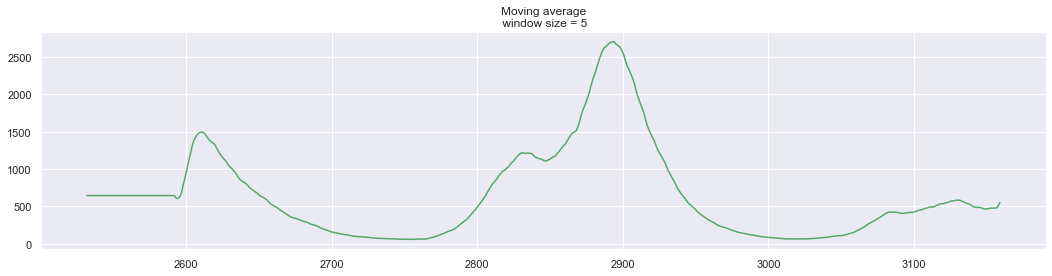

In [44]:
#Despite confirming above that Hospitalised data were float and contained no missing, I'm still getting this error

plot_moving_average(sample_ci, 5, plot_intervals=False)

TypeError: unhashable type: 'numpy.ndarray'

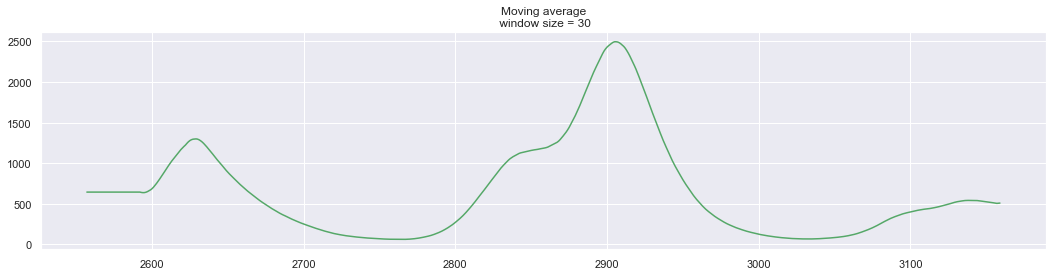

In [45]:
plot_moving_average(sample_ci, 30, plot_intervals=False)